In [4]:
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Chargement des données

In [5]:
digits = pd.read_csv("./data-csv/train.csv")
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = digits["label"]
x = digits[digits.columns.drop("label")]

# Analyse

In [8]:
# evaluation du nombre de données par modélisation (ex: il y a 4684 lignes avec le label 1)
digits['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Découpage du jeu de données (futur modèle)

In [9]:
# reparti le set entre un set de train et un set de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=42)

In [10]:
# nombre de fois où un label est utilisé dans l'entrainement
y_train.value_counts()

1    3138
7    2949
3    2915
9    2806
2    2799
6    2772
0    2768
4    2728
8    2722
5    2543
Name: label, dtype: int64

In [11]:
# nombre de fois où un label est utilisé dans l'entrainement
y_test.value_counts()

1    1546
7    1452
3    1436
9    1382
2    1378
6    1365
0    1364
4    1344
8    1341
5    1252
Name: label, dtype: int64

In [12]:
# on remarque que y_train.value_counts() + y_test.value_counts() = digits['label'].value_counts()
# la division du set a donc été effectuée correctement 
y_train.value_counts() + y_test.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Entrainement du modèle et prediction

In [56]:
depth = range(2,12)
estimators_count = range(2,100)
errors = []
estimators = []
depths = []
err_default = 15

for e in estimators_count:
    print(e)
    for d in depth:
        estimators.append(e)
        depths.append(d)
        model = RandomForestClassifier(n_estimators=e, n_jobs=-1, max_depth=d)
        model.fit(x_train, y_train)

        err = round((1.0 - model.score(x_test, y_test)) * 100, 3)
        errors.append(err)
    #print(f"\n\nResults : decision tree = {modelDecisionTreeClassifier.get_depth()} => err_test = {err}\n")
    #print(f'Improvement of {-(err - err_default)}%\n\n')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


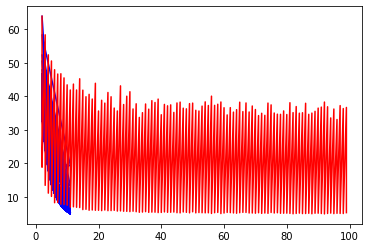

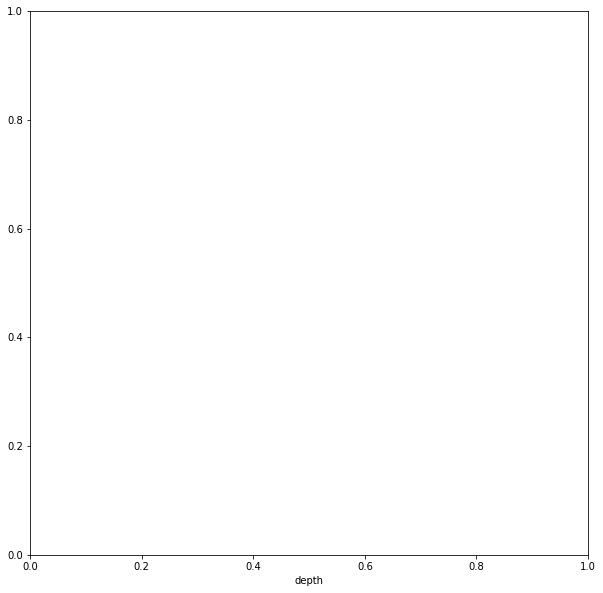

In [62]:
# # evolution du taux d'erreurs par rapport au niveau de profondeur
# estimators = range(2,150)
# errors = []
# err_default = 15

# for e in estimators:
#     model = RandomForestClassifier(n_estimators=e, max_depth=12)
#     model.fit(x_train, y_train)

#     err = round((1.0 - model.score(x_test, y_test)) * 100, 3)
#     errors.append(err)
#     #print(f"\n\nResults : decision tree = {modelDecisionTreeClassifier.get_depth()} => err_test = {err}\n")
#     #print(f'Improvement of {-(err - err_default)}%\n\n')

plt.plot(depths, errors, 'b')
plt.plot(estimators, errors, 'r')
plt.figure(figsize=(10, 10))
plt.xlabel('depth')
plt.show()





# Entrainement et prédiction optimals 

In [43]:
# entrainement du modèle 
OPTIMUM_DEPTH = 12
# modelDecisionTreeClassifier = tree.DecisionTreeClassifier(max_depth=OPTIMUM_DEPTH)
# modelDecisionTreeClassifier = modelDecisionTreeClassifier.fit(x_train, y_train)
model = RandomForestClassifier(n_estimators=2, max_depth=10)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=2)

In [44]:
# prediction sur x_test
y_prediction = model.predict(x_test)

In [45]:
# affichage prédiction
y_prediction

array([9, 6, 5, ..., 5, 0, 3])

In [46]:
# set d'origine
y_test

3467     9
36891    6
33659    5
20365    6
8340     0
        ..
29853    5
6166     9
8253     5
27736    0
40623    5
Name: label, Length: 13860, dtype: int64

# Retour sur expérience - pourcentage d'erreur

In [47]:
conf_mat = confusion_matrix(y_test, y_prediction)

In [48]:
acc = conf_mat.diagonal().sum()/conf_mat.sum()

In [49]:
err = 1 - acc
print("taux d'erreur:", err * 100)

taux d'erreur: 18.867243867243864


# Sauvegarde du modèle

In [18]:
filename = "./model.pkl"

pickle.dump(modelDecisionTreeClassifier, open(filename, 'wb'))